# Introdução a séries temporais

Uma série temporal é um conjunto de observações de uma variável ao longo do tempo.

Alguns exemplos de séries temporais:

- Temperatura registrada ao longo do ano em uma cidade;
- Faturamento das vendas de sorvete ao longo do ano;
- Valores de emissão de CO2 em uma cidade;
- Preço das ações de determinada companhia;
- Número de acidentes ocorridos em uma rodovia durante um mês.

Algumas características:

- Autocorrelação;
- Tendência;
- Sazonalidade.

<img src="https://i1.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/series-temporais-2-1024x644.png?resize=1024%2C644" alt="Número de passageiros x tempo" style="width: 800px;"/>

# Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Importando dados de COVID-19

Dados extraídos do [Our World in Data](https://ourworldindata.org/coronavirus-data). Mais detalhes no repositório: https://github.com/owid/covid-19-data/tree/master/public/data

In [2]:
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71489,ZWE,Africa,Zimbabwe,2021-02-22,35862.0,66.0,91.429,1441.0,5.0,4.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71490,ZWE,Africa,Zimbabwe,2021-02-23,35910.0,48.0,85.000,1448.0,7.0,4.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71491,ZWE,Africa,Zimbabwe,2021-02-24,35960.0,50.0,76.714,1456.0,8.0,5.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71492,ZWE,Africa,Zimbabwe,2021-02-25,35994.0,34.0,64.429,1458.0,2.0,5.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


## Preenchendo valores nulos

In [4]:
df = df.fillna(0)

In [5]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71489,ZWE,Africa,Zimbabwe,2021-02-22,35862.0,66.0,91.429,1441.0,5.0,4.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71490,ZWE,Africa,Zimbabwe,2021-02-23,35910.0,48.0,85.000,1448.0,7.0,4.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71491,ZWE,Africa,Zimbabwe,2021-02-24,35960.0,50.0,76.714,1456.0,8.0,5.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71492,ZWE,Africa,Zimbabwe,2021-02-25,35994.0,34.0,64.429,1458.0,2.0,5.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


## Manipulando tipos das colunas

In [6]:
df = df.astype({'total_cases': int, 'new_cases': int,
                'new_cases_smoothed': int, 'total_deaths': int, 'new_deaths': int, 
                'new_deaths_smoothed': int})

In [7]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1,1,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1,0,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1,0,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1,0,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1,0,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71489,ZWE,Africa,Zimbabwe,2021-02-22,35862,66,91,1441,5,4,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71490,ZWE,Africa,Zimbabwe,2021-02-23,35910,48,85,1448,7,4,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71491,ZWE,Africa,Zimbabwe,2021-02-24,35960,50,76,1456,8,5,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71492,ZWE,Africa,Zimbabwe,2021-02-25,35994,34,64,1458,2,5,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [8]:
df.date = pd.to_datetime(df.date)

In [9]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1,1,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1,0,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1,0,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1,0,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1,0,0,0,0,0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71489,ZWE,Africa,Zimbabwe,2021-02-22,35862,66,91,1441,5,4,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71490,ZWE,Africa,Zimbabwe,2021-02-23,35910,48,85,1448,7,4,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71491,ZWE,Africa,Zimbabwe,2021-02-24,35960,50,76,1456,8,5,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71492,ZWE,Africa,Zimbabwe,2021-02-25,35994,34,64,1458,2,5,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


## Filtrando apenas os dados do Brasil

In [10]:
brasil = df[df.location == 'Brazil']

In [11]:
brasil.reset_index(drop=True)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,BRA,South America,Brazil,2020-02-26,1,1,0,0,0,0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
1,BRA,South America,Brazil,2020-02-27,1,0,0,0,0,0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
2,BRA,South America,Brazil,2020-02-28,1,0,0,0,0,0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
3,BRA,South America,Brazil,2020-02-29,2,1,0,0,0,0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
4,BRA,South America,Brazil,2020-03-01,2,0,0,0,0,0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,BRA,South America,Brazil,2021-02-22,10195160,26986,46921,247143,639,1052,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
363,BRA,South America,Brazil,2021-02-23,10257875,62715,47984,248529,1386,1084,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
364,BRA,South America,Brazil,2021-02-24,10324463,66588,49388,249957,1428,1123,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
365,BRA,South America,Brazil,2021-02-25,10390461,65998,51405,251498,1541,1148,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765


## Selecionando colunas

In [12]:
brasil = brasil[['date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths']]

In [13]:
brasil

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths
9186,2020-02-26,1,1,0,0,0
9187,2020-02-27,1,0,0,0,0
9188,2020-02-28,1,0,0,0,0
9189,2020-02-29,2,1,0,0,0
9190,2020-03-01,2,0,0,0,0
...,...,...,...,...,...,...
9548,2021-02-22,10195160,26986,46921,247143,639
9549,2021-02-23,10257875,62715,47984,248529,1386
9550,2021-02-24,10324463,66588,49388,249957,1428
9551,2021-02-25,10390461,65998,51405,251498,1541


## Plotando gráficos das variáveis ao longo do tempo

In [14]:
new_cases = brasil[['date', 'new_cases']]
new_cases.set_index('date', inplace=True)

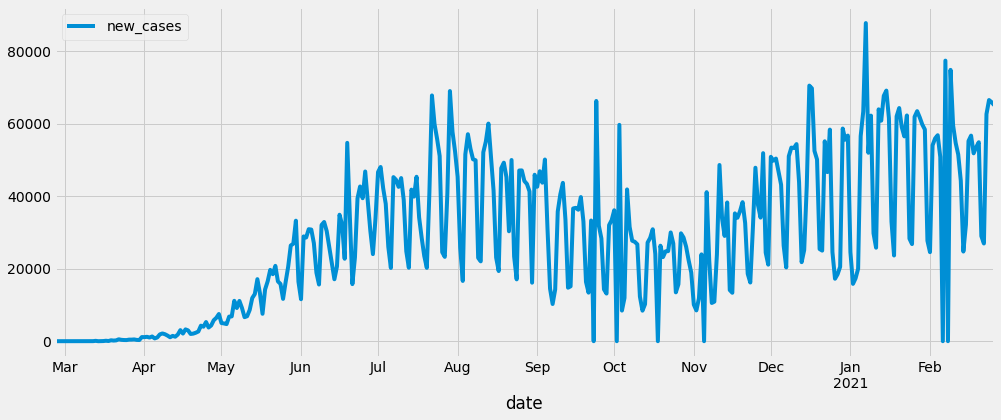

In [15]:
new_cases.plot(figsize=(15, 6))
plt.show()

In [16]:
new_cases_smoothed = brasil[['date', 'new_cases_smoothed']]
new_cases_smoothed.set_index('date', inplace=True)

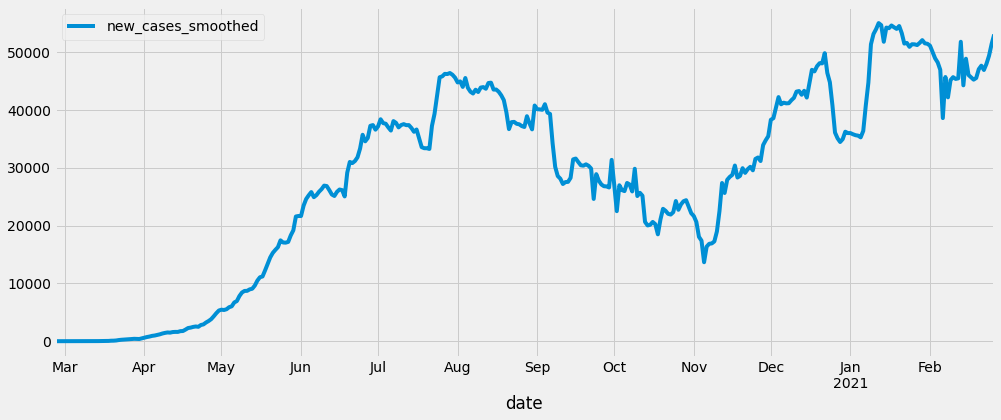

In [17]:
new_cases_smoothed.plot(figsize=(15,6))
plt.show()

In [18]:
total_cases = brasil[['date', 'total_cases']]
total_cases.set_index('date', inplace=True)

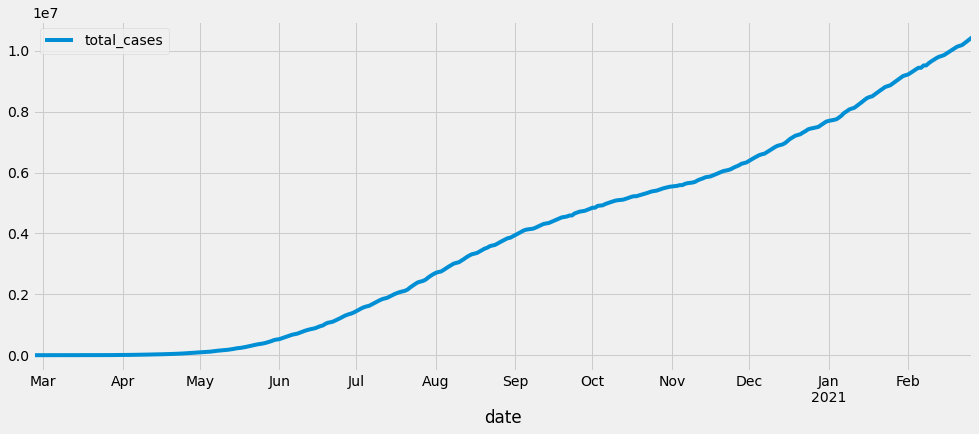

In [19]:
total_cases.plot(figsize=(15,6))
plt.show()

In [20]:
new_deaths = brasil[['date', 'new_deaths']]
new_deaths.set_index('date', inplace=True)

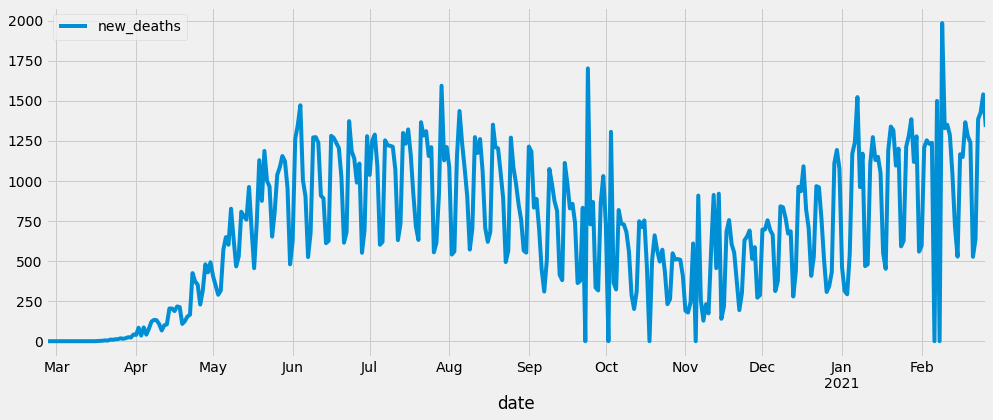

In [21]:
new_deaths.plot(figsize=(15,6))
plt.show()

In [22]:
total_deaths = brasil[['date', 'total_deaths']]
total_deaths.set_index('date', inplace=True)

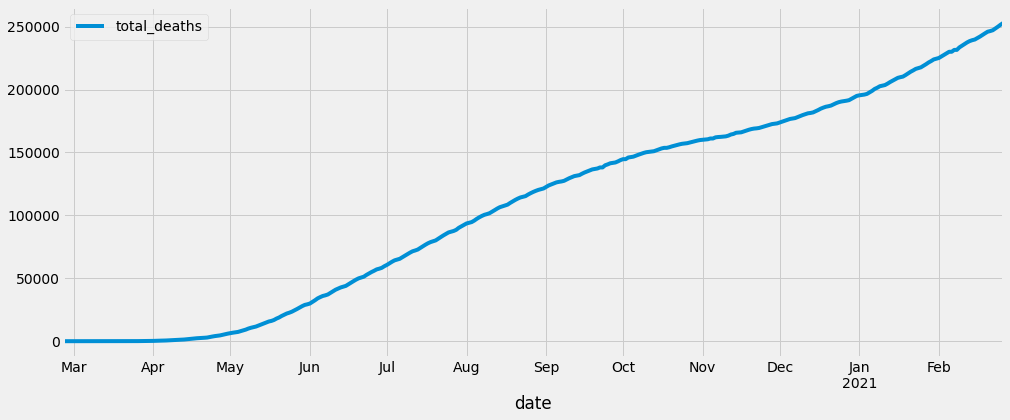

In [23]:
total_deaths.plot(figsize=(15,6))
plt.show()

50 mil novas mortes em 2021, em apenas 2 meses aconteceram 25% de todas as mortes por COVID-19 em 2020

# Pré-processamento

## Tornando a série estacionária

Um pré-requisito para que uma série temporal seja previsível é que ela seja estacionária.

Uma série temporal é dita estacionária quando ela se desenvolve no tempo aleatoriamente ao redor de uma média constante, refletindo alguma forma de equilíbrio estável. Tornar a série estacionária **elimina qualquer tendência ou sazonalidade**.

<img src="https://miro.medium.com/max/700/0*Dyml4bSlkE5WHdcc">

Primeira diferença:
- ΔZ(t) = Z(t) − Z(t−1)

Segunda diferença:
- Δ2Z(t) = Δ \[ΔZ(t)\] = Δ \[Z(t) − Z(t−1)\]

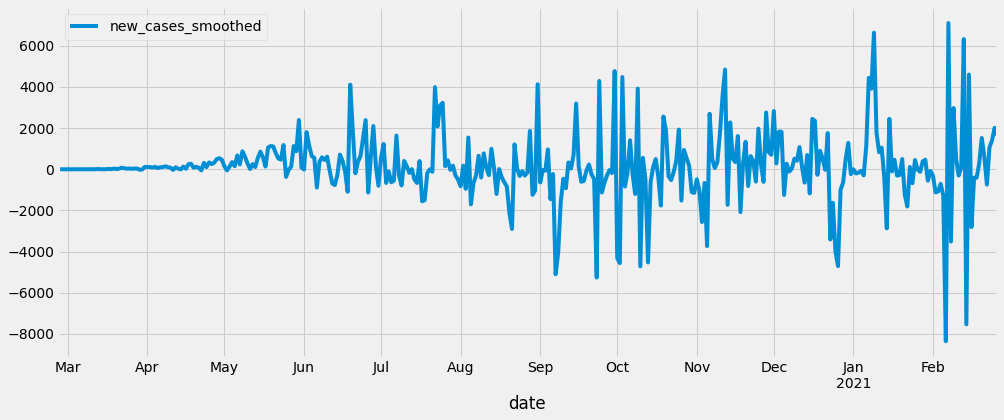

In [24]:
new_cases_diff = new_cases_smoothed.diff()
new_cases_diff.plot(figsize=(15,6))
plt.show()

In [25]:
new_cases_diff.drop(index=pd.to_datetime('2020-02-26'), axis=0, inplace=True)
new_cases_diff

,new_cases_smoothed
date,
2020-02-27,0.0
2020-02-28,0.0
2020-02-29,0.0
2020-03-01,0.0
2020-03-02,0.0
...,...
2021-02-22,-744.0
2021-02-23,1063.0
2021-02-24,1404.0


## Teste Dickey-Fuller Aumentado

- H0: A série temporal é não-estacionária
- H1: A série temporal é estacionária



- **p-value > 0.05**: aceitamos a hipótese nula (H0) -> **a série é não-estacionária**
- **p-value <= 0.05**: rejeitamos a hipótese nula (H0) e aceitamos a hipótese alternativa (H1) -> **a série é estacionária**

In [26]:
from statsmodels.tsa.stattools import adfuller

def print_adfuller(serie):
    result = adfuller(serie)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [27]:
print_adfuller(new_cases_smoothed)

ADF Statistic: -1.313228
p-value: 0.623099
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [28]:
print_adfuller(new_cases_diff)

ADF Statistic: -4.640330
p-value: 0.000109
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


# Predizendo valores

## Dividindo base entre treino e teste

In [29]:
train = new_cases_smoothed[:'2021-01-31']
test = new_cases_smoothed['2021-02-01':]

In [30]:
train

,new_cases_smoothed
date,
2020-02-26,0
2020-02-27,0
2020-02-28,0
2020-02-29,0
2020-03-01,0
...,...
2021-01-27,51232
2021-01-28,51617
2021-01-29,52084


In [31]:
test

,new_cases_smoothed
date,
2021-02-01,51132
2021-02-02,50008
2021-02-03,48934
2021-02-04,48229
2021-02-05,46950
2021-02-06,38598
2021-02-07,45701
2021-02-08,42188
2021-02-09,45163


## Modelos ARIMA

**ARIMA**

**A**uto**R**egressive **I**ntegrated **M**oving **A**verage


Utiliza dados passados para prever o futuro, usando a autocorrelação e médias móveis.


<img src="https://miro.medium.com/max/524/0*Ql_BphTqarSBmgrZ" style="widith=400px" />


- AR -> p (PACF)
- I -> d (diferenças não sazonais)
- MA -> q (ACF)



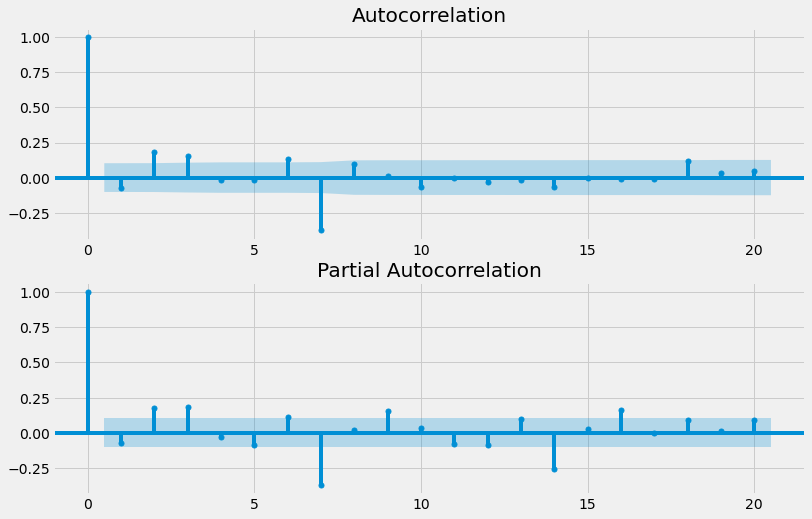

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(new_cases_diff,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_cases_diff,lags=20,ax=ax2)

In [33]:
from statsmodels.tsa.arima_model import ARIMA

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

model = ARIMA(train, order=(2, 0, 2))
results = model.fit(disp=-1)

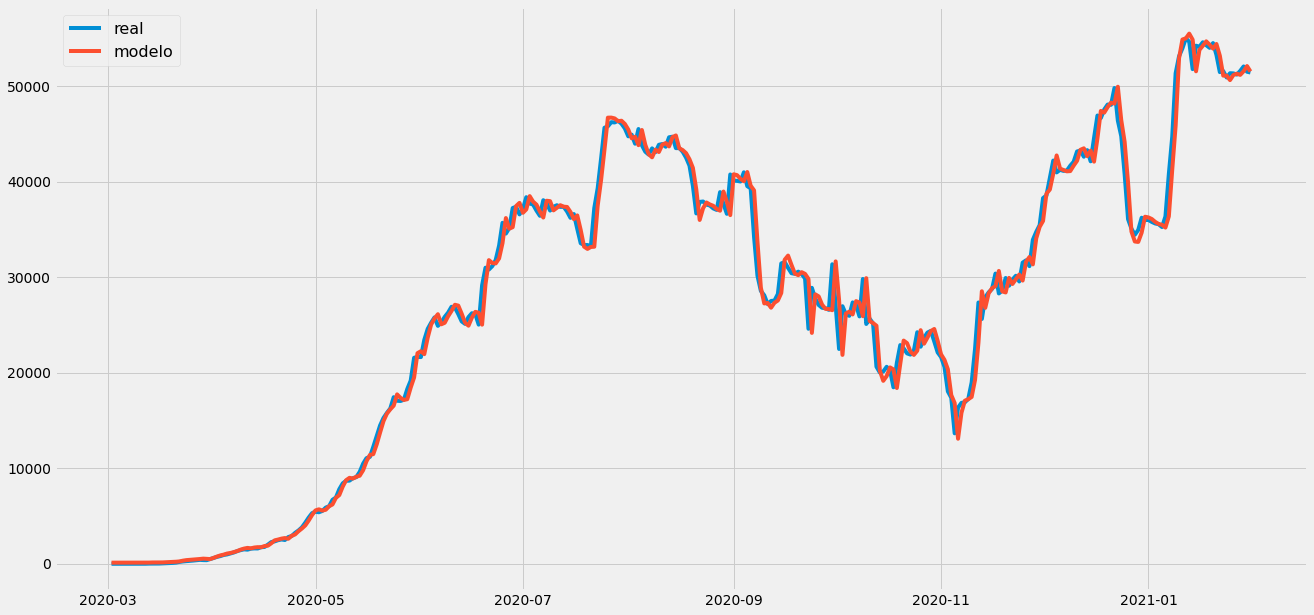

In [34]:
plt.figure(figsize=(20,10))
plt.plot(train['2020-03-02':], label='real')
plt.plot(results.fittedvalues['2020-03-02':], label='modelo')
plt.legend(loc='upper left', fontsize=16)
plt.show()

In [35]:
fitted = model.fit(disp=5)  

# Forecast
fc, se, conf = fitted.forecast(len(test))

# Avaliando métricas do modelo

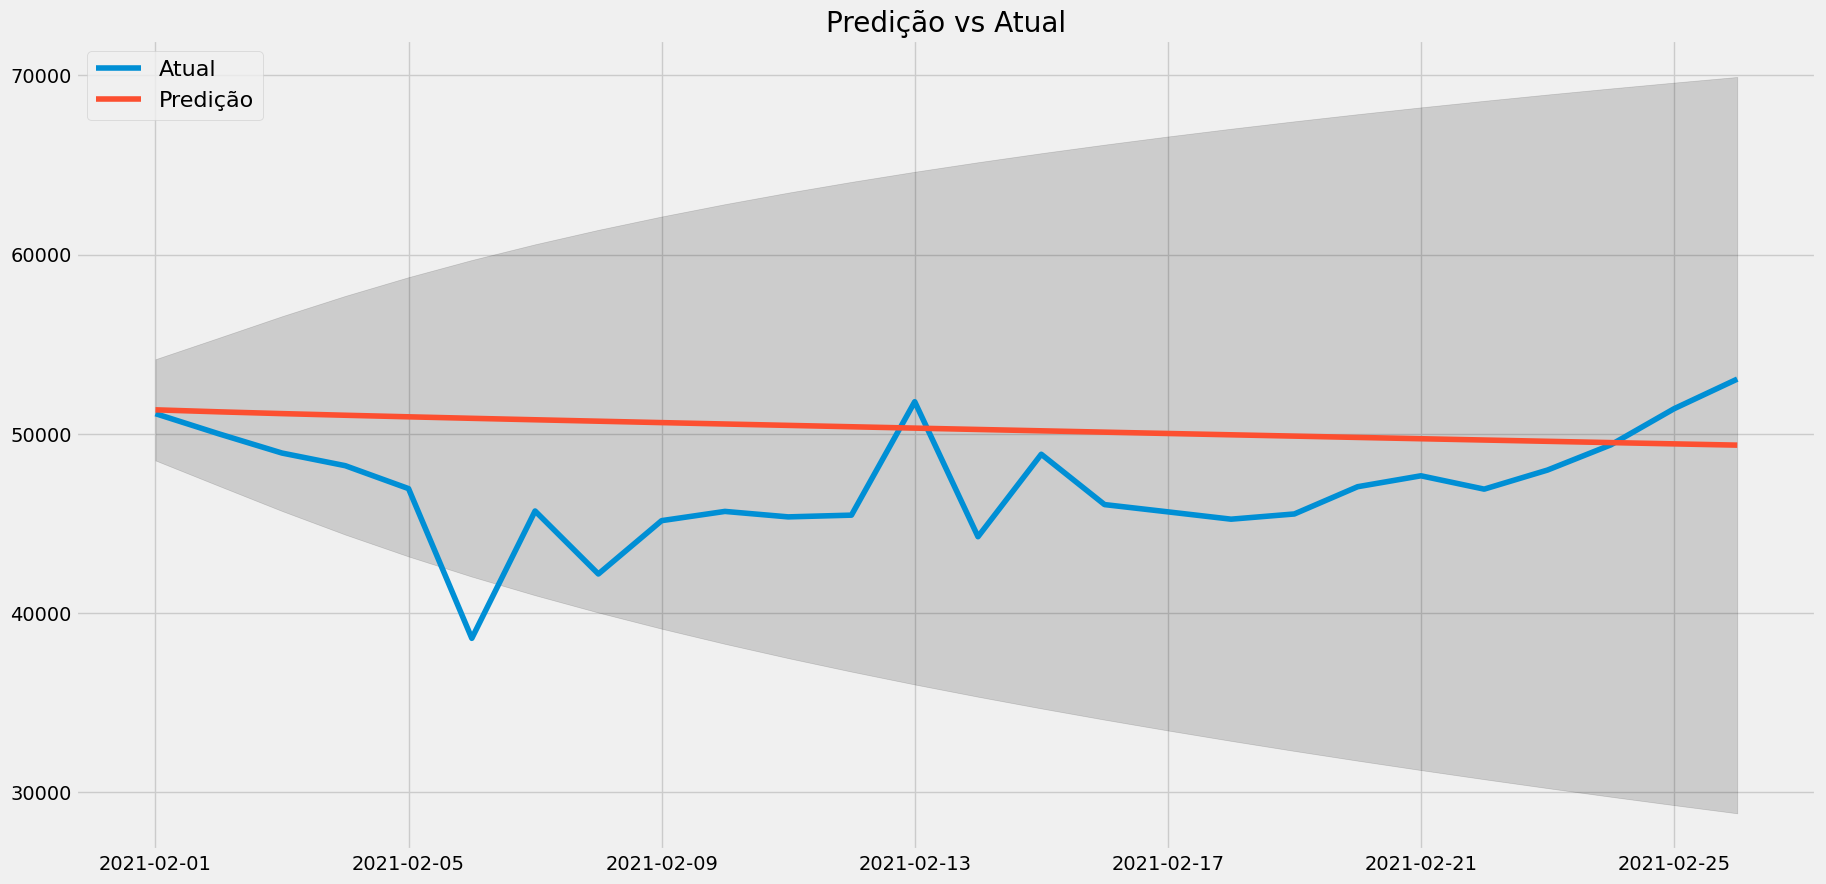

In [36]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,10), dpi=100)
plt.plot(test, label='Atual')
plt.plot(fc_series, label='Predição')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Predição vs Atual')
plt.legend(loc='upper left', fontsize=16)
plt.show()

In [37]:
forecast = pd.DataFrame(fc_series, columns=['new_cases'])

In [38]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    print ('MAPE: {:.4f}'.format(mape))
    print ('ME: {:.2f}'.format(me))
    print ('RMSE: {:.2f}'.format(rmse))
    return({'mape':mape, 'me':me, 'rmse':rmse})

In [39]:
metrics = forecast_accuracy(forecast.new_cases, test.new_cases_smoothed)

MAPE: 0.0836
ME: 3217.39
RMSE: 4553.42


## Março de 2021

In [40]:
warnings.filterwarnings("ignore") 

new_model = ARIMA(new_cases_smoothed, order=(2, 0, 2))
new_results = new_model.fit(disp=0)

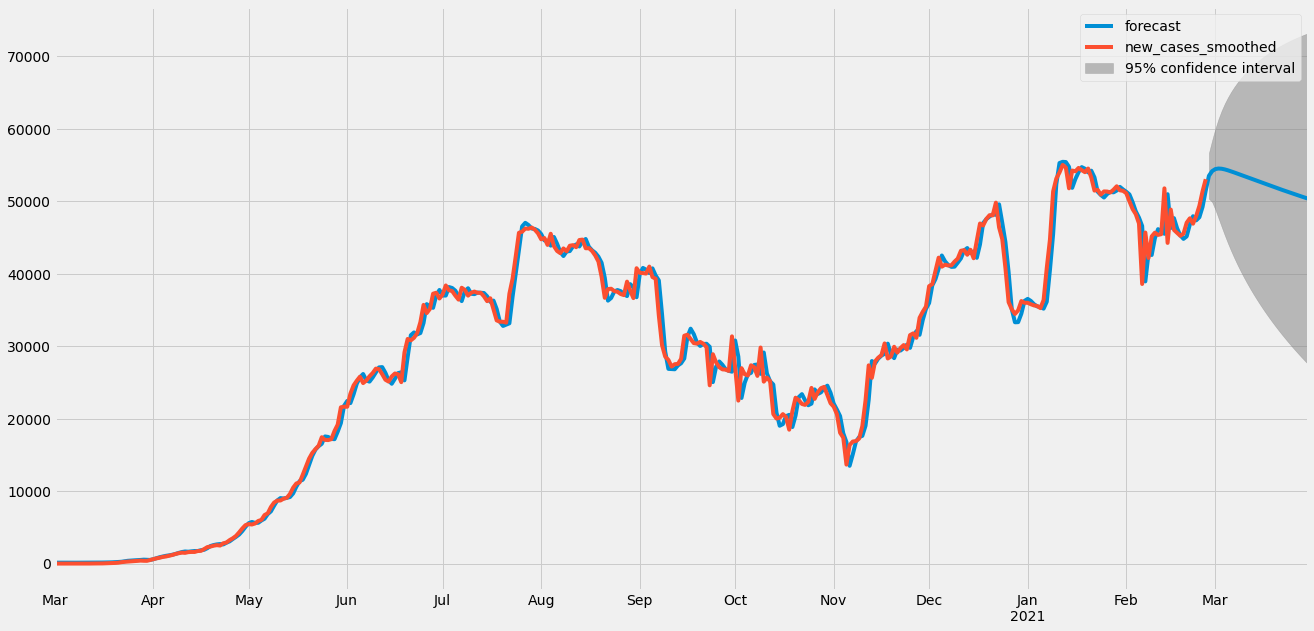

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
fig = new_results.plot_predict(start='2020-03-01', end='2021-03-30', ax=ax)
plt.show()